# Intervalos de Confianza para Proporciones
Intervalos de confianza para proporciones muestrales dentro del contexto de inferencia estadística. 

Se implementan funciones en Python para calcular intervalos de confianza aproximados y exactos, y se presentan resultados tabulares y gráficos para facilitar la interpretación.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, beta
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import samplesize_confint_proportion

plt.style.use('seaborn-v0_8-whitegrid')

def intervalo_proporcion_normal(x: int, n: int, confidence: float) -> dict:
    """Calcula intervalo de confianza normal aproximado para una proporción."""
    p_hat = x / n                         # estimador puntual de la proporción donde x es el número de éxitos y n el tamaño de la muestra
    alpha = 1 - confidence                # nivel de significancia
    z = norm.ppf(1 - alpha / 2)           # valor crítico z
    se = np.sqrt(p_hat * (1 - p_hat) / n) # error estándar
    error = z * se                        # error máximo
    return {
        "p_hat": p_hat,                   # estimador puntual
        "z": z,                           # valor crítico z
        "se": se,                         # error estándar
        "lower": max(0.0, p_hat - error), # límite inferior
        "upper": min(1.0, p_hat + error), # límite superior
        "error": error,                   # error máximo
        "confidence": confidence,         # nivel de confianza
        "n": n,                           # tamaño de la muestra
        "x": x                            # número de éxitos
    }

def intervalo_proporcion_clopper_pearson(x: int, n: int, confidence: float) -> tuple[float, float]:
    """Intervalo exacto (Clopper-Pearson) útil como referencia para muestras pequeñas."""
    alpha = 1 - confidence                                          # nivel de significancia
    lower = beta.ppf(alpha / 2, x, n - x + 1) if x > 0 else 0.0     # límite inferior donde x es el número de éxitos y n el tamaño de la muestra
    upper = beta.ppf(1 - alpha / 2, x + 1, n - x) if x < n else 1.0 # límite superior
    return lower, upper

def resumen_intervalo(nombre: str, resultado: dict, intervalo_exacta: tuple[float, float] | None = None) -> pd.DataFrame:
    """Arma un resumen tabular para reportar un intervalo de confianza."""
    data = {
        "escenario": [nombre],                                    # nombre del escenario
        "muestra (x/n)": [f"{resultado['x']}/{resultado['n']}"],  # tamaño de la muestra
        "p_con_hat": [resultado["p_hat"]],                        # estimador puntual
        "nivel_confianza": [resultado["confidence"]],             # nivel de confianza
        "limite_inferior": [resultado["lower"]],                  # límite inferior
        "limite_superior": [resultado["upper"]],                  # límite superior
        "error_maximo": [resultado["error"]]                      # error máximo
    }
    df = pd.DataFrame(data)
    if intervalo_exacta is not None:
        df["cp_inferior"], df["cp_superior"] = intervalo_exacta
    return df

Problema A

En una encuesta telefónica a 420 clientes de una cadena de supermercados, 150 indicaron que utilizan la aplicación móvil para realizar compras. Con un nivel de confianza del 92%, determine el intervalo de confianza para la proporción de clientes que usan la aplicación.

In [2]:
# Definimos el tamaño de la muestra, el número de éxitos y el nivel de confianza
n1 = 420         # tamaño de la muestra
x1 = 150         # número de personas que usan la aplicación móvil
conf1 = 0.92     # nivel de confianza (92%)

# Calculamos la proporción muestral
p_hat1 = x1 / n1

# Calculamos n*p_hat*(1-p_hat) para verificar el supuesto de normalidad
npq1 = n1 * p_hat1 * (1 - p_hat1)
condicion_normal_1 = npq1 >= 10   # True si se cumple el supuesto de normalidad

# Calculamos el intervalo de confianza aproximado usando la normal
res1 = intervalo_proporcion_normal(x1, n1, conf1)

# Calculamos el intervalo exacto de Clopper-Pearson (útil para referencia)
cp1 = intervalo_proporcion_clopper_pearson(x1, n1, conf1)

# Creamos un DataFrame con los parámetros y resultados relevantes
parametros1 = pd.DataFrame({
    "parametro": ["n", "x", "p_hat", "n*p_hat*(1-p_hat)", "condicion_normal"],
    "valor": [n1, x1, p_hat1, npq1, condicion_normal_1]
})

# Mostramos el DataFrame con el resumen de parámetros
parametros1

,parametro,valor
0,n,420
1,x,150
2,p_hat,0.357143
3,n*p_hat*(1-p_hat),96.428571
4,condicion_normal,True


In [ ]:
# Visualizamos la distribución simulada de p_hat y su intervalo de confianza
num_simulaciones = 10000
simulaciones = np.random.binomial(n1, p_hat1, size=num_simulaciones) / n1

fig, ax = plt.subplots(figsize=(6, 3))
ax.hist(simulaciones, bins=30, color="tab:blue", alpha=0.7, edgecolor="white")
ax.axvline(res1["lower"], color="tab:red", linestyle="--", label=f"Límite inferior {res1['lower']:.3f}")
ax.axvline(res1["upper"], color="tab:red", linestyle="--", label=f"Límite superior {res1['upper']:.3f}")
ax.axvline(res1["p_hat"], color="tab:orange", linestyle="-", label=f"p̂ {res1['p_hat']:.3f}")
ax.set_title("Distribución simulada de p̂ y su intervalo 92%")
ax.set_xlabel("Proporción simulada")
ax.set_ylabel("Frecuencia")
ax.legend()
plt.show()

Problema B

Durante una consulta previa a elecciones, se seleccionaron aleatoriamente 950 votantes registrados; 310 declararon intención de apoyar al candidato B.

1. Con un nivel de confianza del 96%, calcule el intervalo que contiene la proporción real de votantes que apoyan a dicho candidato.
2. -Explique cómo se modifica la amplitud del intervalo al aumentar o reducir el nivel de confianza, manteniendo fija la muestra.

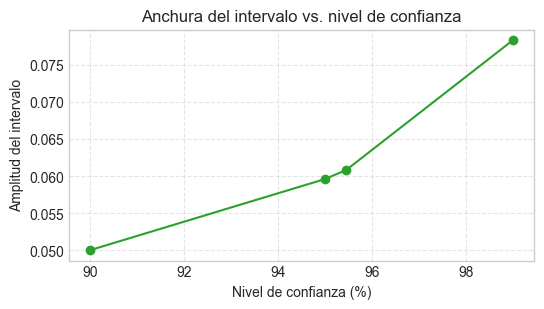

In [3]:
# ----------------------------------------------
# 1.
# ----------------------------------------------
# Definimos el tamaño de la muestra, el número de éxitos y el nivel de confianza
n1 = 950         # tamaño de la muestra
x1 = 310         # número de votantes que apoyan al candidato B
conf1 = 0.96     # nivel de confianza (96%)

# Calculamos la proporción muestral
p_hat1 = x1 / n1

# Calculamos n*p_hat*(1-p_hat) para verificar el supuesto de normalidad
npq1 = n1 * p_hat1 * (1 - p_hat1)
condicion_normal_1 = npq1 >= 10   # True si se cumple el supuesto de normalidad

# Calculamos el intervalo de confianza aproximado usando la normal
res1 = intervalo_proporcion_normal(x1, n1, conf1)

# Calculamos el intervalo exacto de Clopper-Pearson (útil para referencia)
cp1 = intervalo_proporcion_clopper_pearson(x1, n1, conf1)

# Creamos un DataFrame con los parámetros y resultados relevantes
parametros1 = pd.DataFrame({
    "parametro": ["n", "x", "p_hat", "n*p_hat*(1-p_hat)", "condicion_normal"],
    "valor": [n1, x1, p_hat1, npq1, condicion_normal_1]
})

# Mostramos el DataFrame con el resumen de parámetros
parametros1

# ----------------------------------------------
# 2.
# ----------------------------------------------
# Visualización del intervalo de confianza usando error bars
niveles_confianza = [0.90, 0.9545, 0.95, 0.99]
registros = []
for nivel in niveles_confianza:
    res_temp = intervalo_proporcion_normal(x1, n1, nivel)
    registros.append({
        "confianza": nivel,
        "z": res_temp["z"],
        "lim_inf": res_temp["lower"],
        "lim_sup": res_temp["upper"],
        "amplitud": res_temp["upper"] - res_temp["lower"],
        "error_maximo": res_temp["error"]
    })

sensibilidad_df = pd.DataFrame(registros).sort_values("confianza").reset_index(drop=True)
sensibilidad_df
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(sensibilidad_df["confianza"] * 100, sensibilidad_df["amplitud"], marker="o", color="tab:green")
ax.set_xlabel("Nivel de confianza (%)")
ax.set_ylabel("Amplitud del intervalo")
ax.set_title("Anchura del intervalo vs. nivel de confianza")
ax.grid(True, linestyle="--", alpha=0.5)
plt.show()

Problema C

Una planta industrial examinó 680 piezas producidas en un turno, hallando 56 defectuosas.

1. Obtenga un intervalo de confianza del 98% para la proporción de piezas defectuosas.
2. Determine el error máximo de estimación asociado al intervalo anterior.
3. Si se requiere que el error máximo sea la mitad del calculado en (2), con el mismo nivel de confianza, ¿cuál debe ser el tamaño mínimo de la muestra?

In [4]:
# ----------------------------------------------
# 1.
# ----------------------------------------------
# Definimos el tamaño de la muestra, el número de éxitos y el nivel de confianza
n1 = 680         # tamaño de la muestra
x1 = 56          # número de piezas defectuosas
conf1 = 0.98     # nivel de confianza (98%)

# Calculamos la proporción muestral
p_hat1 = x1 / n1

# Calculamos n*p_hat*(1-p_hat) para verificar el supuesto de normalidad
npq1 = n1 * p_hat1 * (1 - p_hat1)
condicion_normal_1 = npq1 >= 10   # True si se cumple el supuesto de normalidad

# Calculamos el intervalo de confianza aproximado usando la normal
res1 = intervalo_proporcion_normal(x1, n1, conf1)

# Calculamos el intervalo exacto de Clopper-Pearson (útil para referencia)
cp1 = intervalo_proporcion_clopper_pearson(x1, n1, conf1)

# Creamos un DataFrame con los parámetros y resultados relevantes
parametros1 = pd.DataFrame({
    "parametro": ["n", "x", "p_hat", "n*p_hat*(1-p_hat)", "condicion_normal"],
    "valor": [n1, x1, p_hat1, npq1, condicion_normal_1]
})

# Mostramos el DataFrame con el resumen de parámetros
parametros1

# ----------------------------------------------
# 2. Determine el error máximo de estimación asociado al intervalo anterior.
error_actual = res1["error"]


# 3. Si se requiere que el error máximo sea la mitad del calculado en (2), con el mismo nivel de confianza, ¿cuál debe ser el tamaño mínimo de la muestra?
error_objetivo = error_actual / 2

# tamaño mínimo de la muestra requerido
'''La expresión usa la fórmula del tamaño muestral para estimar proporciones con error máximo controlado:
p̂(1−p̂) aproxima la varianza poblacional, z es el valor crítico del nivel de confianza y error_objetivo es el error máximo deseado. 
Al elevar z/error_objetivo al cuadrado y multiplicar por la varianza, obtenemos el tamaño mínimo requerido; np.ceil redondea hacia arriba y int lo convierte en entero.'''
n_requerido = int(np.ceil(res1["p_hat"] * (1 - res1["p_hat"]) * (res1["z"] / error_objetivo) ** 2))
print("Tamaño muestra mínimo requerido (fórmula):", n_requerido)

# con statsmodels
n_requerido_sm = samplesize_confint_proportion(
    proportion=res1["p_hat"],           # proporción muestral
    half_length=error_objetivo,   # error máximo deseado
    alpha=1 - res1["confidence"], # nivel de significancia 1 - conf1
    method='normal'               # método normal aproximado
)
n_requerido_sm = int(np.ceil(n_requerido_sm))
print("Tamaño muestra mínimo requerido (statsmodels):", n_requerido_sm)

resumen3 = resumen_intervalo("Tornillos defectuosos (99%)", res1, cp1)

diagnostico3 = pd.DataFrame({
    "parametro": ["n", "x", "p_hat", "condicion_normal"],
    "valor": [n1, x1, p_hat1, condicion_normal_1]
})

dimensionamiento = pd.DataFrame({
    "escenario": ["Error actual", "Error objetivo", "Tamaño muestral requerido"],
    "valor": [error_actual, error_objetivo, n_requerido]
})

diagnostico3, resumen3, dimensionamiento



Tamaño muestra mínimo requerido (fórmula): 2721
Tamaño muestra mínimo requerido (statsmodels): 2721


(          parametro     valor
 0                 n       680
 1                 x        56
 2             p_hat  0.082353
 3  condicion_normal      True,
                      escenario muestra (x/n)  p_con_hat  nivel_confianza  \
 0  Tornillos defectuosos (99%)        56/680   0.082353             0.98   
 
    limite_inferior  limite_superior  error_maximo  cp_inferior  cp_superior  
 0         0.057829         0.106877      0.024524     0.059597     0.110129  ,
                    escenario        valor
 0               Error actual     0.024524
 1             Error objetivo     0.012262
 2  Tamaño muestral requerido  2721.000000)